In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
test_X = pd.read_csv('data/test_data_cleaned.csv')
test_Y = pd.read_csv('data/test_labels_cleaned.csv')
train_data = pd.read_csv('data/train_data_cleaned.csv')

In [75]:
#change name of column to lowercase
test_X.columns = test_X.columns.str.lower()
test_Y.columns = test_Y.columns.str.lower()
train_data.columns = train_data.columns.str.lower()

In [76]:
test_X.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs
0,1,7393090,59,19,single,rented,0,geologist,malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,0,firefighter,jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,0,lawyer,thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,1,analyst,latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,1,comedian,berhampore,West Bengal,13,11


In [77]:
test_Y.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [78]:
train_data.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,0,mechanical_engineer,rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,0,software_developer,parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,0,technical_writer,alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,1,software_developer,bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,0,civil_servant,tiruchirappalli,Tamil_Nadu,3,14,1


# Checking repartition of classes

In [79]:
# Get different classes and percentage of each class
classes = train_data['risk_flag'].unique()

train_class_percentage = train_data['risk_flag'].value_counts(normalize=True)
test_class_percentage = test_Y['risk_flag'].value_counts(normalize=True)

# Print classes and percentage of each class
print('Train data')
for i in range(len(classes)):
    print('Class : ',classes[i],'\tPercentage : ',train_class_percentage[i])

print('\nTest data')
for i in range(len(classes)):
    print('Class : ',classes[i],'\tPercentage : ',test_class_percentage[i])

Train data
Class :  0 	Percentage :  0.877
Class :  1 	Percentage :  0.123

Test data
Class :  0 	Percentage :  0.8716785714285714
Class :  1 	Percentage :  0.12832142857142856


Dataset très déséquilibré

In [80]:
# Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(train_data.drop('risk_flag',axis=1), train_data['risk_flag'])

In [81]:
# reformating train data after under sampling
rus_train_data = pd.concat([pd.DataFrame(X_resampled),pd.DataFrame(y_resampled)],axis=1)

In [82]:
#save under sampled data
rus_train_data.to_csv('data/train_data_cleaned_balanced.csv',index=False)

In [83]:
rus_train_data.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,105347,5360758,50,15,married,rented,1,air_traffic_controller,guntur,Andhra_Pradesh,6,11,0
1,109687,706221,44,9,single,rented,0,biomedical_engineer,erode,Tamil_Nadu,9,13,0
2,172257,9931632,51,4,married,rented,0,scientist,ozhukarai,Puducherry,4,12,0
3,163375,9777389,29,9,single,owned,0,comedian,kharagpur,West_Bengal,9,14,0
4,122433,3846302,66,14,single,rented,1,petroleum_engineer,bhatpara,West_Bengal,6,11,0


# Data analysis

In [84]:
#remove id column
rus_train_data = rus_train_data.drop('id',axis=1)
#categorical feature are of type object
category_features = rus_train_data.select_dtypes(include=['object']).columns
numerical_features = rus_train_data.select_dtypes(exclude=['object']).columns

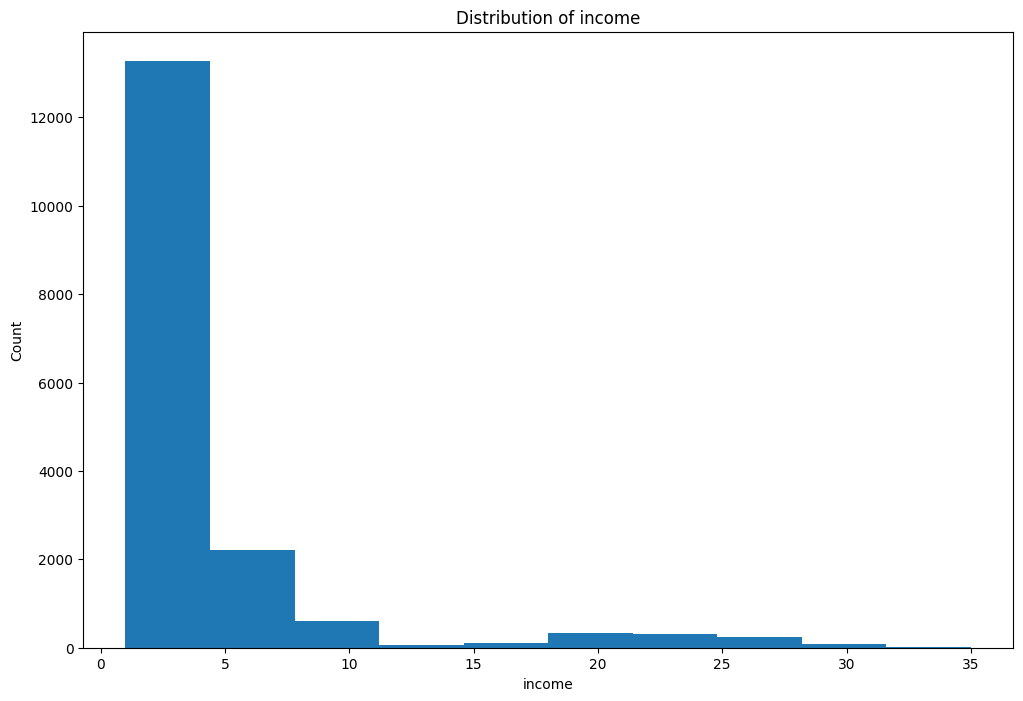

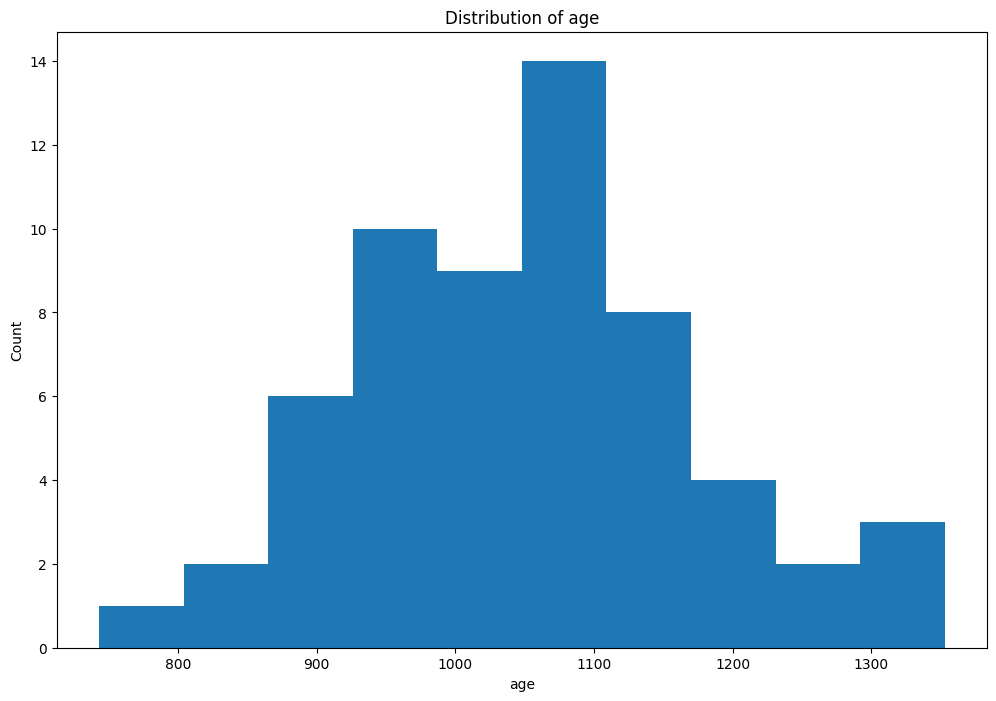

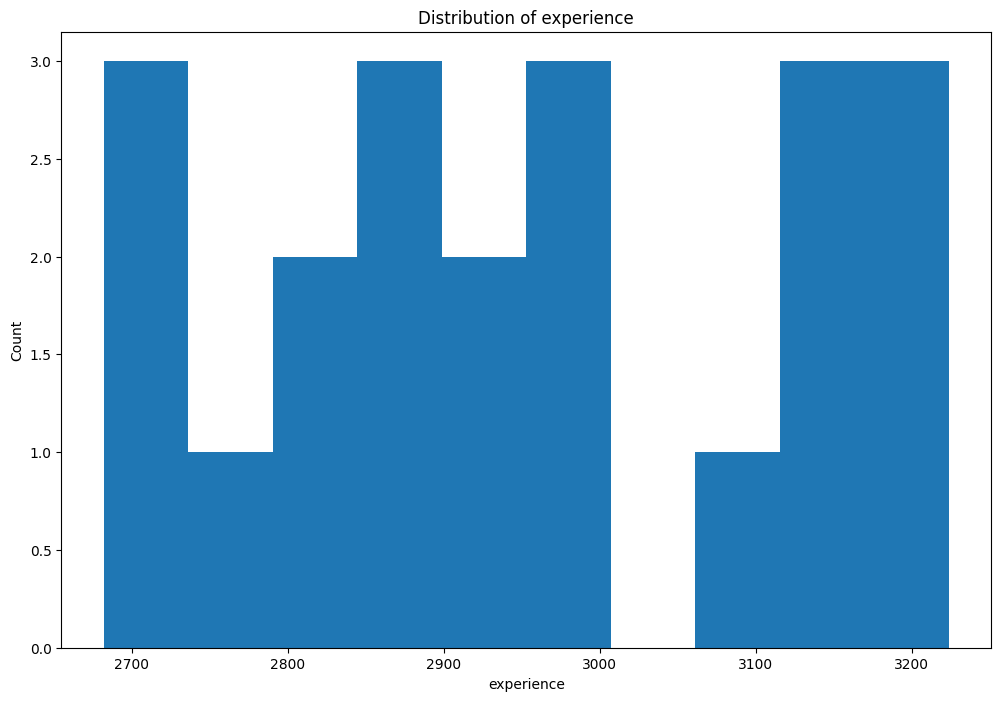

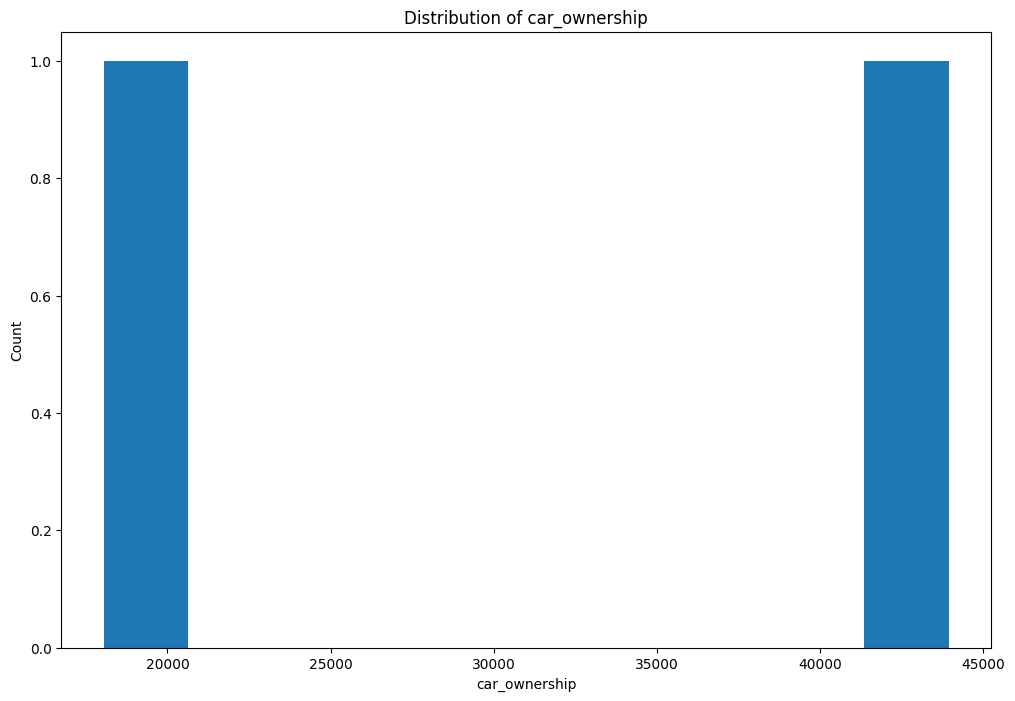

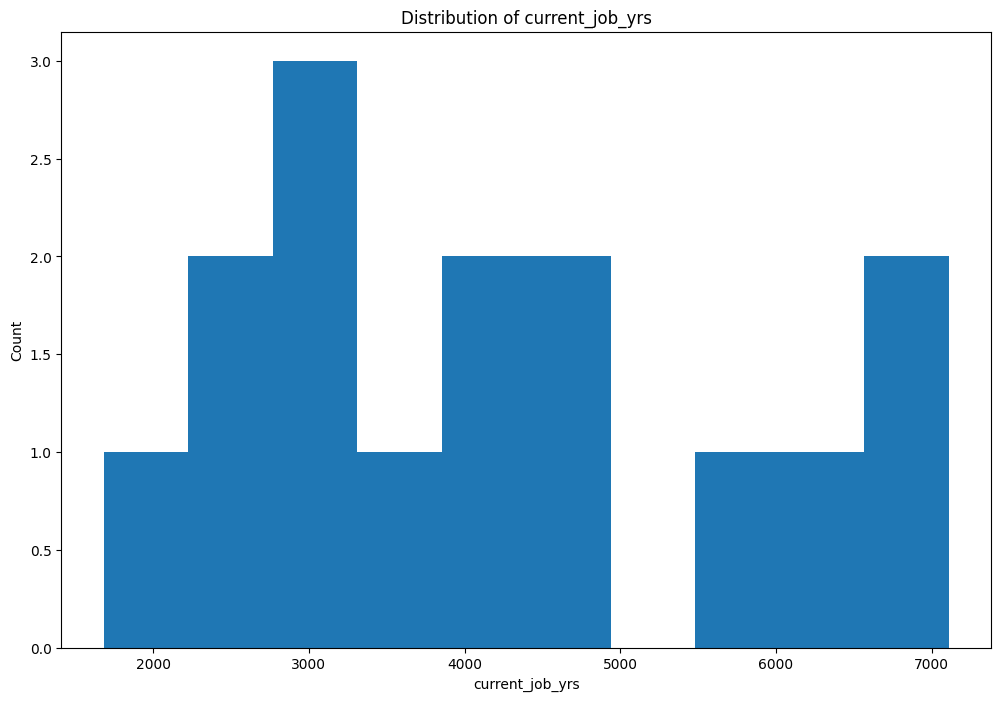

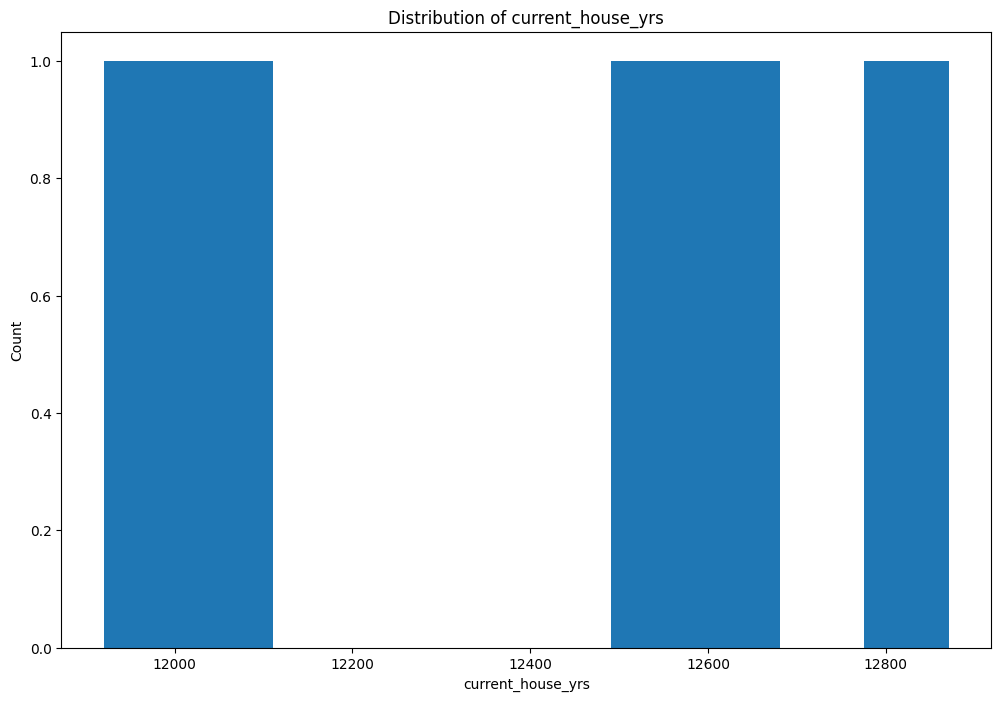

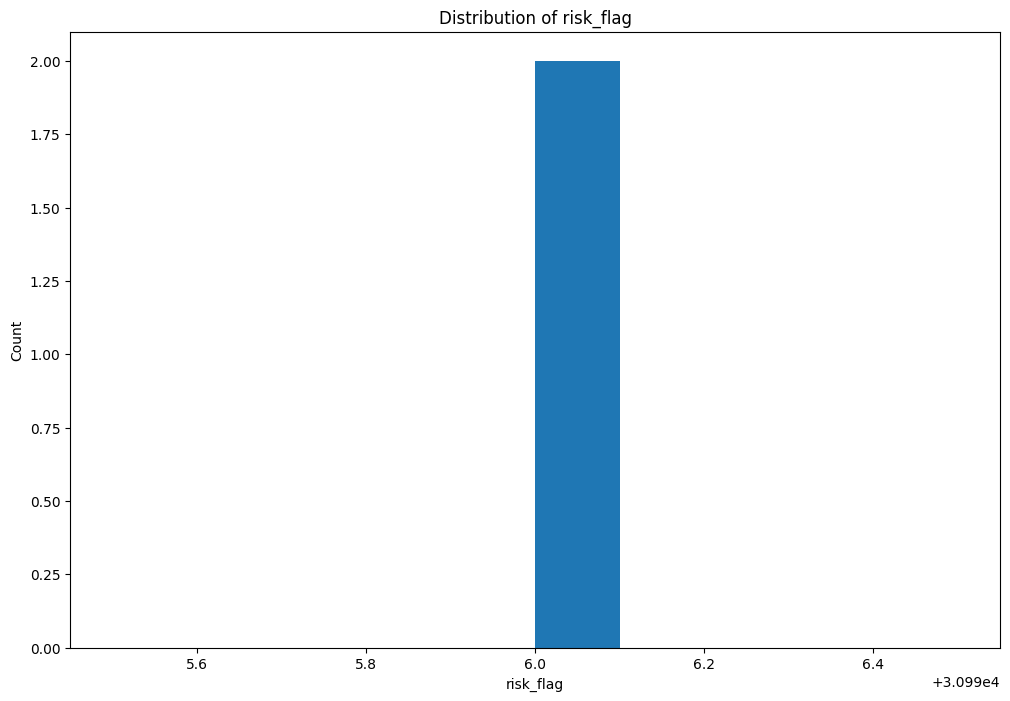

In [85]:
for numerical in numerical_features:
    plt.figure(figsize=(12, 8))
    rus_train_data[numerical].value_counts().plot(kind="hist")
    plt.title(f'Distribution of {numerical}')
    plt.xlabel(numerical)
    plt.ylabel('Count')
    plt.show()

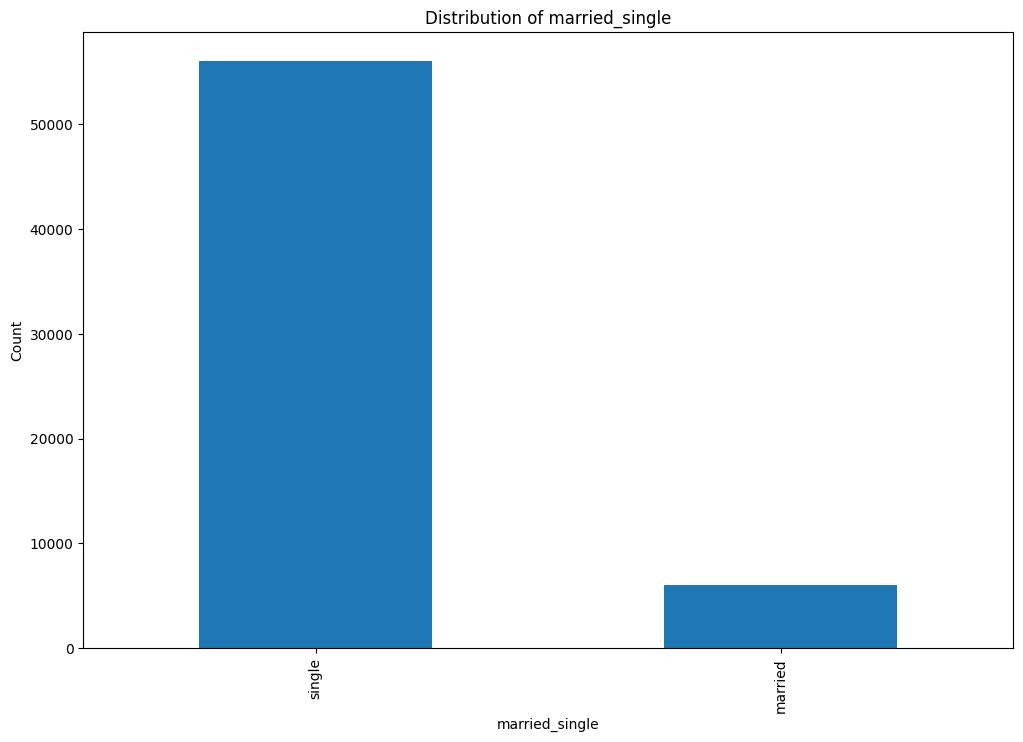

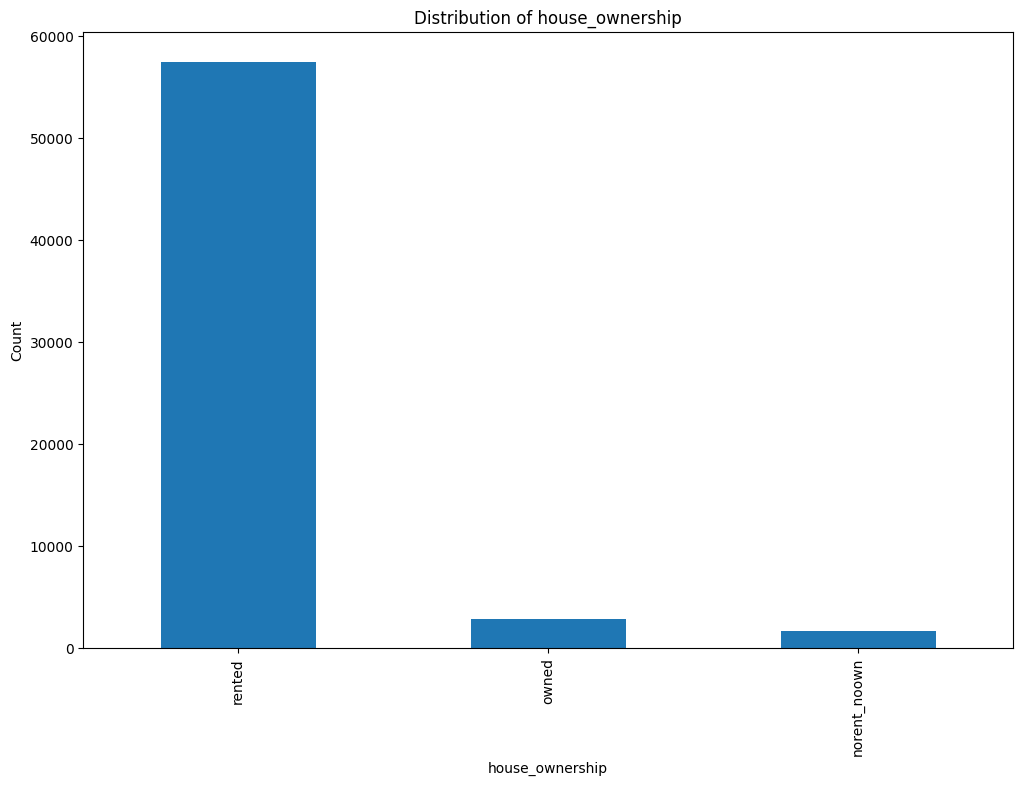

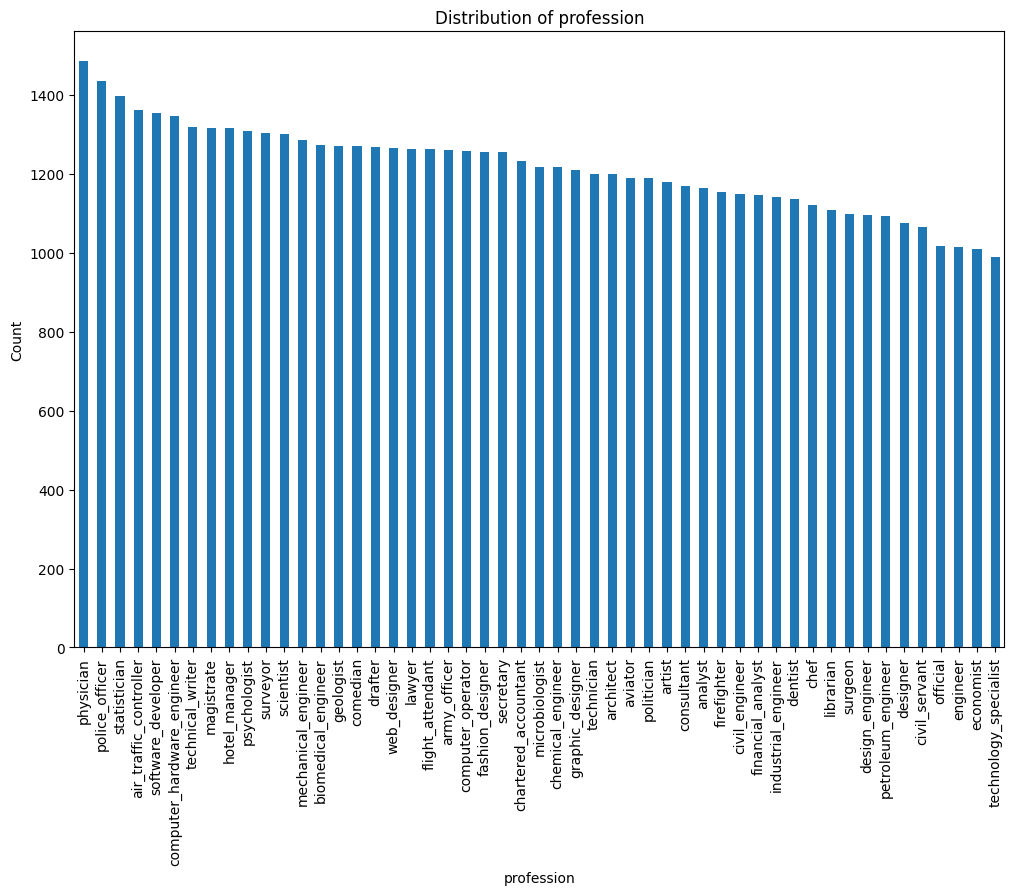

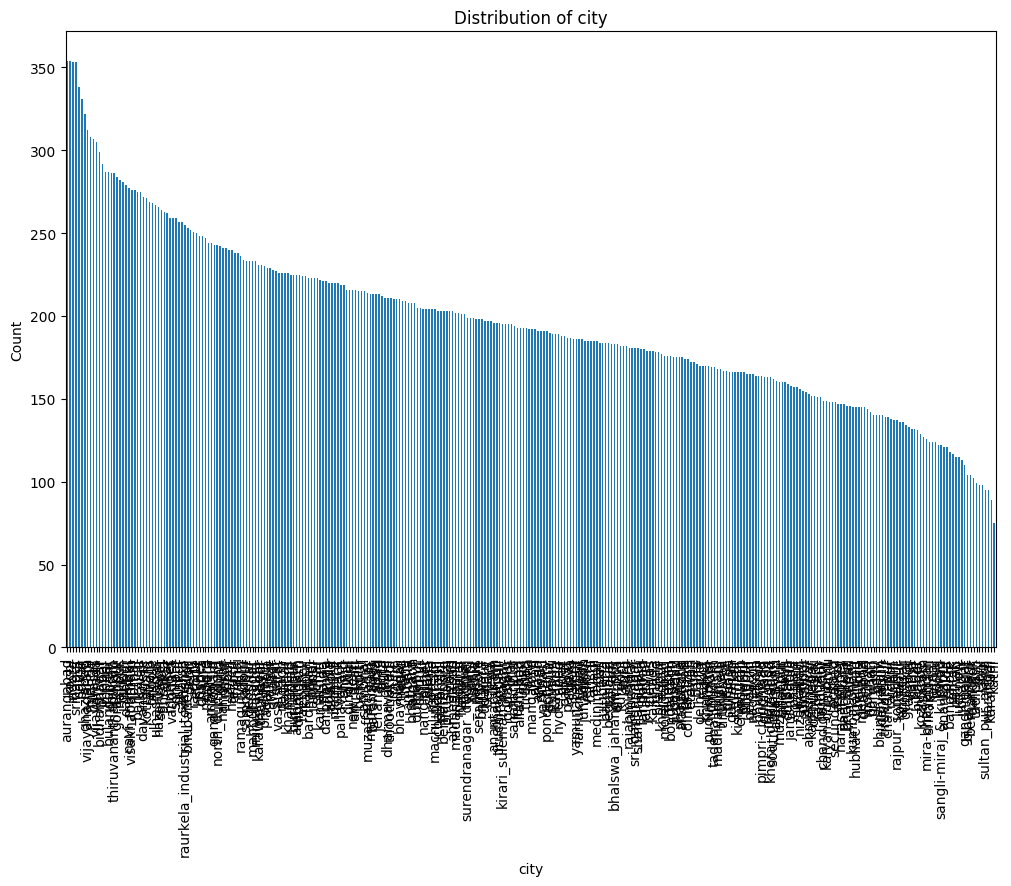

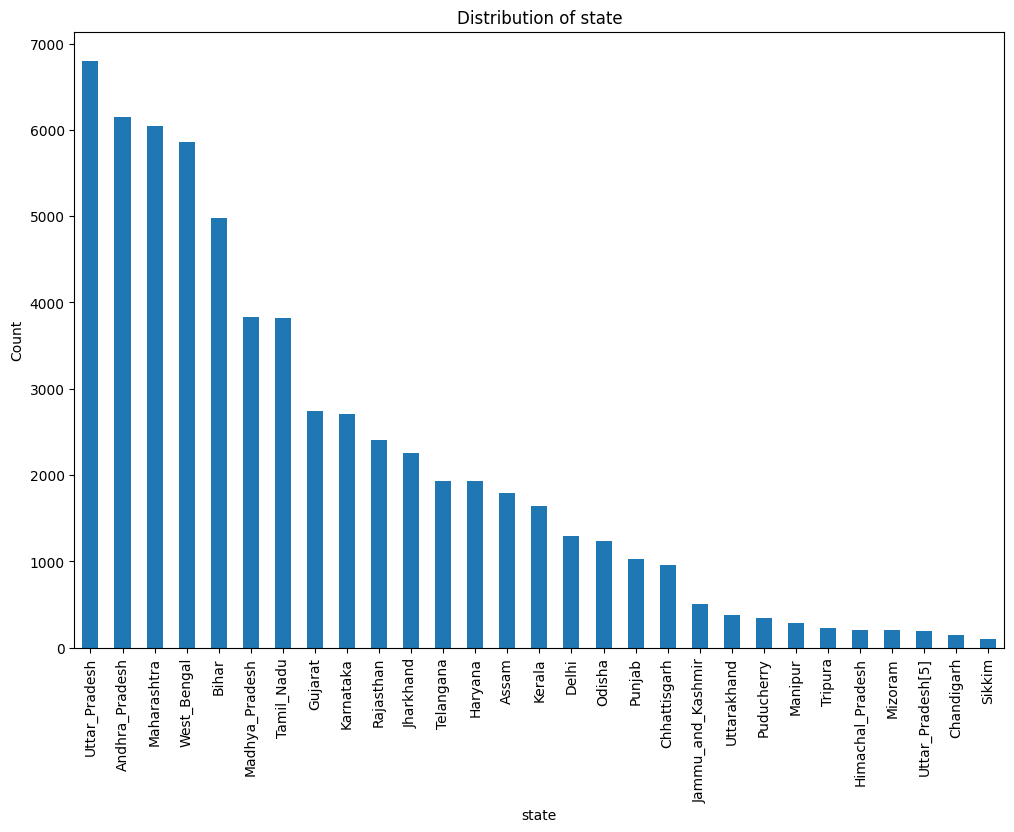

In [86]:
for category in category_features:
    plt.figure(figsize=(12, 8))
    rus_train_data[category].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.show()